El código comienza cargando los datos de la página de Wikipedia que contiene información sobre las 500 empresas del índice S&P 500. Luego se procesan los datos para obtener la lista de símbolos de las empresas y se descargan los datos históricos del índice S&P 500 en el periodo 2000-01-01 al 2023-02-23 utilizando la biblioteca yfinance. A continuación, se descargan los datos históricos para cada empresa en la lista de símbolos utilizando el mismo método. Luego se eliminan las filas con valores faltantes y se almacenan los datos en un diccionario con el símbolo de la empresa como clave. Finalmente, se muestra un resumen de la cantidad de datos descargados y almacenados en el diccionario.

In [5]:
import pandas as pd
import yfinance as yf
#Para más información sobre este módulo ir a: https://aroussi.com/post/python-yahoo-finance

In [6]:
# Cargamos info del wikipedia para las 500 empresas del índice S&P 500
sp_wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
 
sp_wiki_df = pd.read_html(sp_wiki_url)

# En la página wiki List_of_S%26P_500_companies hay dos tablas que son las que se cargan
len(sp_wiki_df)

# A nosotros sólo nos interesa la primera que es la que contiene los nombres y códigos de las empresas 
sp_df = sp_wiki_df[0]

# En particular nos interesan los codigos bajo la columna 'Symbol'
sp_Symbol = list(sp_df['Symbol'])


In [ ]:
# Descargar datos del índice S&P 500
sp500 = yf.download("^GSPC", start='2000-01-01')
print(f"Descargados {len(sp500)} datos para el índice S&P 500")

# Descargar datos de las empresas del índice S&P 500
sp500_tickers = sp_Symbol
sp500_companies = {}

for ticker in sp500_tickers:
    data = yf.download(ticker, start='2000-01-01')
    if not data.empty:
        print(f"Descargados {len(data)} datos para {ticker}")
        data.dropna(inplace=True)
        sp500_companies[ticker] = data
    else:
        print(f"No se pudieron descargar los datos para {ticker}")

print(f"Descargados los datos para {len(sp500_companies)} empresas")


In [ ]:
los_faltantes = [ 'BF-B', 'BRK-B']
for ticker in los_faltantes:
    data = yf.download(ticker, start='2000-01-01')
    if not data.empty:
        print(f"Descargados {len(data)} datos para {ticker}")
        data.dropna(inplace=True)
        sp500_companies[ticker] = data
    else:
        print(f"No se pudieron descargar los datos para {ticker}")

##### Vamos a exportar los data frames del diccionario a cvs para no depender de la descarga

In [10]:
import os

# Nombre de la carpeta que se va a crear
folder_name = "sp500_data"

# Ruta donde se creará la carpeta
path = os.path.join(os.getcwd(), folder_name)

# Crear la carpeta si no existe
if not os.path.exists(path):
    os.mkdir(path)

# Guardar los archivos CSV en la carpeta creada
for symbol, data in sp500_companies.items():
    file_name = symbol + ".csv"
    file_path = os.path.join(path, file_name)
    data.to_csv(file_path)

##### Vamos a volver a armar el diccionario a partir de los cvs para comprobar

In [1]:
import os
import pandas as pd

# Especificar la ruta de la carpeta que contiene los archivos CSV
folder_path = 'sp500_data'

# Obtener los nombres de los archivos CSV en la carpeta
file_names = os.listdir(folder_path)

# Inicializar un diccionario para almacenar los datos
sp500_companies = {}

# Recorrer los archivos CSV en la carpeta y cargarlos en el diccionario
for file_name in file_names:
    # Extraer el símbolo de la empresa del nombre del archivo
    symbol = file_name[:-4]
    # Leer el archivo CSV y almacenar los datos en el diccionario
    sp500_companies[symbol] = pd.read_csv(os.path.join(folder_path, file_name), index_col=0)

# Mostrar el número de empresas cargadas
print(f"Se cargaron los datos de {len(sp500_companies)} empresas")

Se cargaron los datos de 503 empresas


##### Hacemo lo mismo para el data frame del índice S&P500

In [ ]:
sp500.to_csv('sp500.csv')

In [2]:
sp500 = pd.read_csv('sp500.csv', index_col=0)
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


---> Hasta el momento tenemos 1 data frame con los datos historicos del 2000  al presente (2023-03-26):

 data frame: 'sp500' 

---> Un diccionario con los 503 data frames de las empresas del S&P 500:

diccionario: 'sp500_companies' 

# *********** Vamos a trabajar con estos archivos ****************

---> Una carpeta con 503 archivos csv correspondientes a los df del diccionario: 

carpeta: 'sp500_data' 

---> Un archio csv con la información del df sp500:

archivo: 'sp500.csv'

# *******************************************************************

#### 1) Exploración para observar la variación de precios a lo largo del tiempo en el índice S&P 500

In [14]:
# Resumen de estadísticas descriptivas
sp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5.844000e+03
mean,1894.291752,1905.653956,1881.986867,1894.503234,1894.503234,3.308855e+09
std,983.157769,988.382661,977.486262,983.275233,983.275233,1.525390e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1185.260010,1192.237488,1177.862518,1185.402557,1185.402557,1.992538e+09
50%,1437.349976,1446.885010,1428.594971,1437.635010,1437.635010,3.415310e+09
75%,2412.132446,2424.940002,2394.467468,2410.262512,2410.262512,4.164900e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


Basándonos en las estadísticas resumidas proporcionadas, podemos inferir lo siguiente:

El índice S&P 500 tuvo un valor mínimo de 679.28 y un valor máximo de 4804.51
El precio de cierre medio y el precio de cierre ajustado han ido aumentando con el tiempo, lo que indica una tendencia alcista a largo plazo en el índice.
La desviación estándar del precio de cierre y del precio de cierre ajustado del índice es bastante alta, lo que indica una cantidad significativa de volatilidad en el mercado.
El volumen de acciones negociadas también ha sido bastante alto, con un volumen medio de 3.300 millones de acciones y un volumen máximo de 11.500 millones de acciones.

##### Basandonos en el precio de cierre ajustado ('Adj Close') podemos observar lo siguiente:

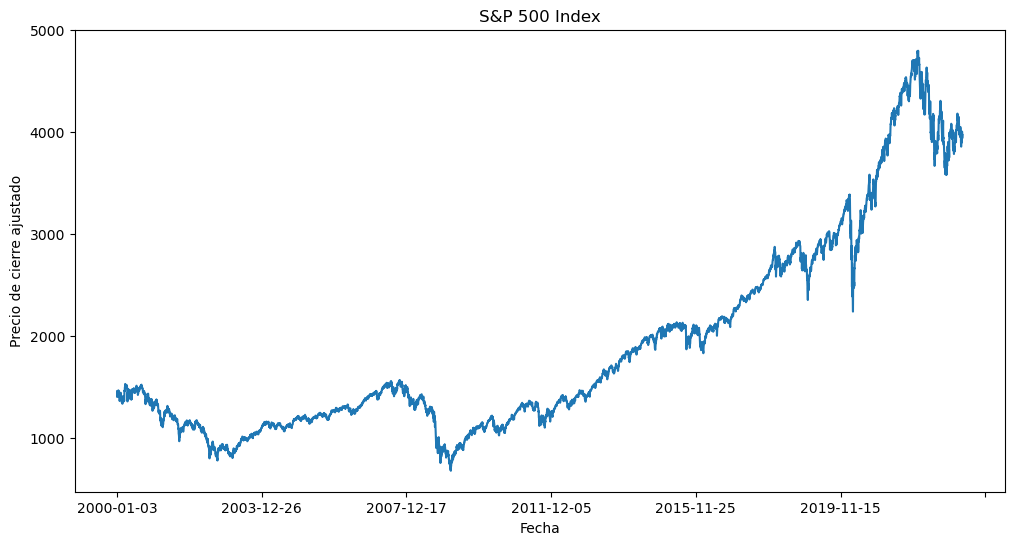

In [16]:
import matplotlib.pyplot as plt

# Create a line graph of the S&P 500 index
fig, ax = plt.subplots(figsize=(12, 6))
sp500['Adj Close'].plot(ax=ax)
plt.title('S&P 500 Index')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')

plt.show()

In [17]:
# Calcular medidas estadísticas
media = sp500['Close'].mean()
desviacion_estandar = sp500['Close'].std()
rango = sp500['Close'].max() - sp500['Close'].min()
percentiles = sp500['Close'].quantile([0.25, 0.5, 0.75])

# Imprimir resultados
print(f"Media: {media:.2f}")
print(f"Desviación estándar: {desviacion_estandar:.2f}")
print(f"Rango: {rango:.2f}")
print(f"Percentiles: \n{percentiles}")

Media: 1894.50
Desviación estándar: 983.28
Rango: 4120.03
Percentiles: 
0.25    1185.402557
0.50    1437.635010
0.75    2410.262512
Name: Close, dtype: float64


Media: El precio promedio del índice S&P 500 durante el período que hemos considerado (desde el año 2000 hasta la fecha en que se descargaron los datos) es de 1894.5 puntos.

Desviación estándar: La desviación estándar de los precios es de 983.28 puntos. Esto indica que los precios del índice S&P 500 han fluctuado considerablemente durante este período, con una gran cantidad de variabilidad en los precios.

Rango: El rango de los precios es de 4120.03 puntos. Esto significa que el precio más alto que se alcanzó en este período es 4120.03 puntos más alto que el precio más bajo.

Percentiles: Los percentiles nos muestran cómo se distribuyen los precios del índice S&P 500 en diferentes cuartiles. Por ejemplo, el 25% de los precios están por debajo de 1184.40 puntos, el 50% están por debajo de 1437.64 puntos y el 75% están por debajo de 2410.26 puntos.

Text(0.5, 1.0, 'Distribución de los precios de cierre ajustados del índice S&P 500')

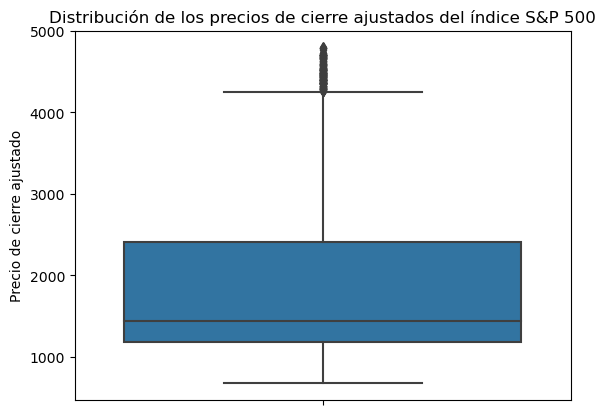

In [18]:
import seaborn as sns

# Creamos un DataFrame con los precios del índice S&P 500
sp500_df = sp500['Adj Close']

# Graficamos un gráfico de caja
sns.boxplot(y=sp500_df)
plt.ylabel('Precio de cierre ajustado')
plt.title('Distribución de los precios de cierre ajustados del índice S&P 500')

Text(0.5, 1.0, 'Distribución de los precios de cierre ajustados del índice S&P 500')

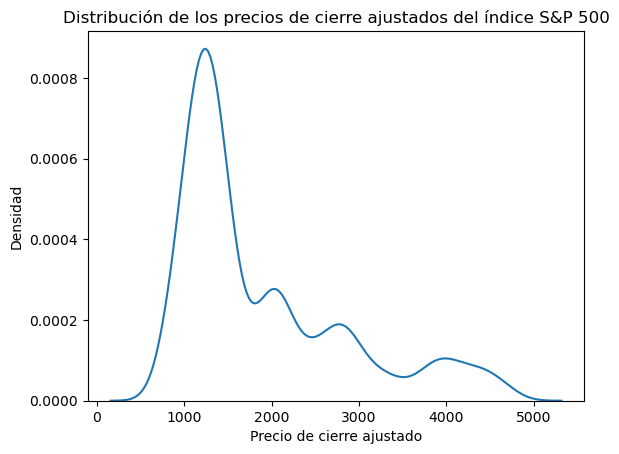

In [19]:
# Realizamos un gráfico de densidad
sns.kdeplot(sp500_df)
plt.xlabel('Precio de cierre ajustado')
plt.ylabel('Densidad')
plt.title('Distribución de los precios de cierre ajustados del índice S&P 500')

#### El índice S&P 500 se pude ver afecatado por eventos importantes como el del COVID, Crisis financieras o Guerras. También se ve afectado por indicadores macroeconómicos como el desempleo, la tasa de interés, el PIB (GDP en inglés), la inflación

In [20]:
events_dict = {
    "Dot-com bubble burst": "2000-03-10",
    "9/11 terrorist attacks": "2001-09-11",
    "Iraq War": "2003-03-20",
    "Financial Crisis": "2008-09-15",
    "Flash Crash": "2010-05-06",
    "US Debt Ceiling Crisis": "2011-08-02",
    "Brexit vote": "2016-06-23",
    "US Presidential Election": "2016-11-08",
    "US-China Trade Tensions": "2018-03-22",
    "COVID-19 pandemic": "2020-02-19",
    "US Presidential Election": "2020-11-03"
}
events_dates_list = events_dict.values()

In [23]:
import pandas as pd

# Load the indice500 data frame
indice500 = pd.read_csv('sp500.csv', index_col=0, parse_dates=True)

# Check if each date exists in the index
for date in events_dates_list:
    while date not in indice500.index:
        date = pd.to_datetime(date) + pd.Timedelta(days=1)
        date = date.strftime('%Y-%m-%d')
    print(f"{date} found in indice500 index.")


2000-03-10 found in indice500 index.
2001-09-17 found in indice500 index.
2003-03-20 found in indice500 index.
2008-09-15 found in indice500 index.
2010-05-06 found in indice500 index.
2011-08-02 found in indice500 index.
2016-06-23 found in indice500 index.
2020-11-03 found in indice500 index.
2018-03-22 found in indice500 index.
2020-02-19 found in indice500 index.


##### Variación en el tiempo del índice con marcas de eventos importantes que pudieron influir en él

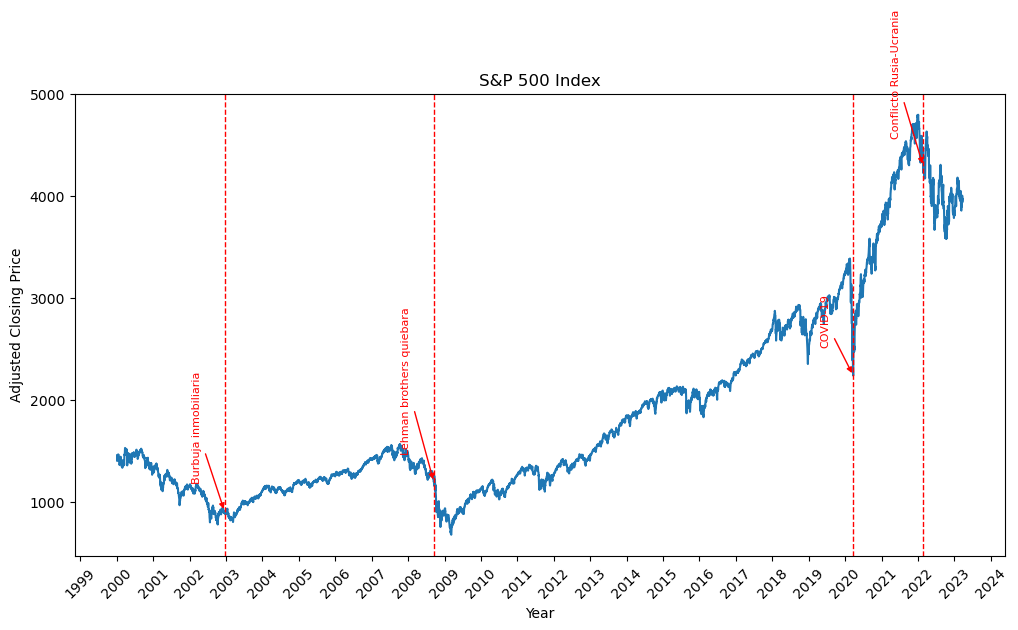

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Load the S&P 500 data
sp500 = pd.read_csv('SP500.csv', index_col='Date', parse_dates=True)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the adjusted close price of the S&P 500 over time
ax.plot(sp500.index, sp500['Adj Close'])

# Set the title, x-label, and y-label
ax.set_title('S&P 500 Index')
ax.set_xlabel('Year')
ax.set_ylabel('Adjusted Closing Price')

# Add vertical lines to represent significant events
events = {'COVID-19': ['2020-03-23'],
          'Burbuja inmobiliaria': ['2002-12-17'],
          'Lehman brothers quiebara': ['2008-09-15'],
           'Conflicto Rusia-Ucrania': ['2022-02-24']}

for event, dates in events.items():
    for date in dates:
        date_num = mdates.datestr2num(date)
        ax.axvline(x=date_num, color='r', linestyle='--', linewidth=1)
        ax.annotate(event, xy=(date_num, sp500.loc[date, 'Adj Close']), xytext=(-20, 20), 
                    textcoords='offset points', ha='center', va='bottom', rotation=90, fontsize=8,
                    color='r', arrowprops=dict(facecolor='r', edgecolor='r', arrowstyle='-|>'))

# Set the x-ticks to display only the year
date_fmt = '%Y'
date_locator = mdates.YearLocator()
date_formatter = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Show the plot
plt.show()


##### Comparativo de la variación del PIB de USA contra el índice S&P 500

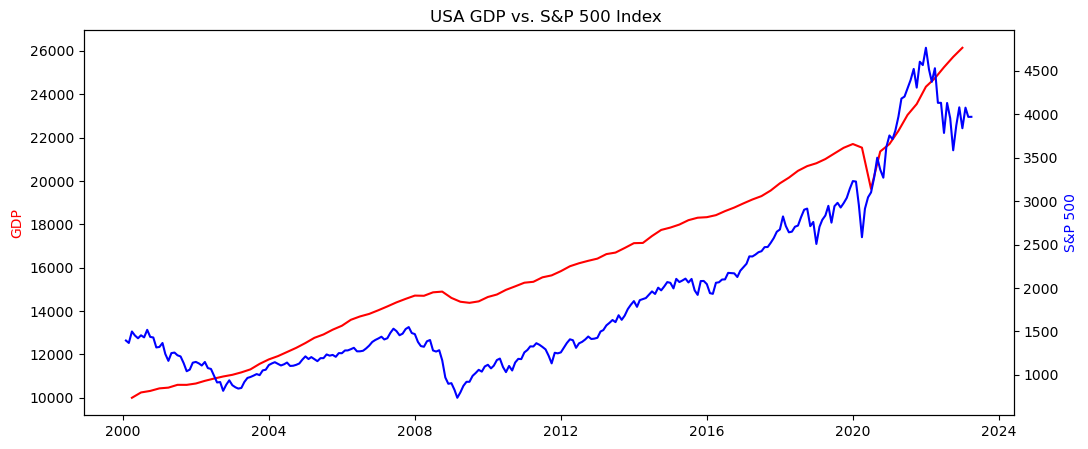

In [25]:
import pandas as pd
import datetime

# set start and end dates
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2022, 1, 1)

# download the GDP data from FRED
gdp = pd.read_csv('https://fred.stlouisfed.org/data/GDP.txt', sep='\s+', skiprows=30, header=None, index_col=0, parse_dates=True)
gdp = gdp.loc['2000':]

# resample the GDP data to quarterly frequency
gdp_q = gdp.resample('Q').last()

# Load the S&P 500 data
sp500 = pd.read_csv('SP500.csv', index_col='Date', parse_dates=True)


# resample the S&P 500 data to monthly frequency
sp500_adj_close = sp500['Adj Close'].resample('M').last()

# plot the data on the same graph
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.set_title('USA GDP vs. S&P 500 Index ')
ax1.plot(gdp_q.index, gdp_q, color='red')
ax1.set_ylabel('GDP', color='red')

ax2 = ax1.twinx()
ax2.plot(sp500_adj_close.index, sp500_adj_close, color='blue')
ax2.set_ylabel('S&P 500', color='blue')

plt.show()


In [65]:
import pandas as pd
import numpy as np

inflation = pd.read_csv('inflacion_USA.csv', index_col='year', parse_dates=True)

# Convert annual inflation rates to decimal and add 1
inflation_factors = 1 + (inflation['inflation'] / 100)

# Calculate cumulative inflation
cumulative_inflation = (inflation_factors.prod() - 1) * 100

print('Cumulative inflation from 1960 to 2020: {:.2f}%'.format(cumulative_inflation))

Cumulative inflation from 1960 to 2020: 829.57%


##### Inflación vs S&P 500 index

[*********************100%***********************]  1 of 1 completed


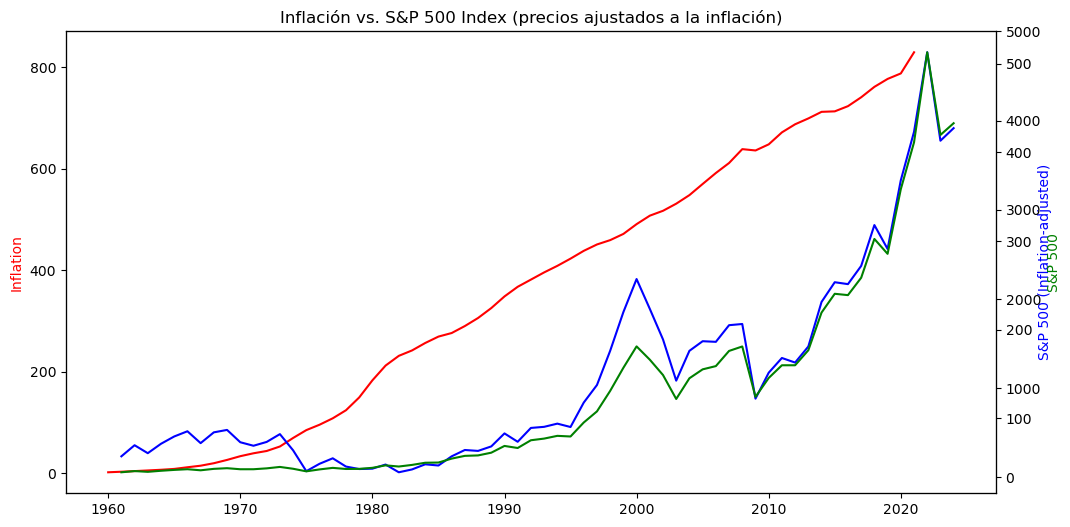

In [71]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


# Download S&P 500 data
sp500_1960 = yf.download("^GSPC", start='1960-01-01')

# Resample the S&P 500 data to annual frequency
sp500_adj_close = sp500_1960['Adj Close'].resample('Y').last()

# Load the inflation data from the CSV file
inflation_df = pd.read_csv('inflacion_USA.csv', index_col='year', parse_dates=True)

inflation_factors = 1 + (inflation_df['inflation'] / 100)
cumulative_inflation_factors = inflation_factors.cumprod()

# Create a new DataFrame for cumulative inflation
df_inflation = pd.DataFrame({
    'year': inflation_df.index,
    'cumulative_inflation': (cumulative_inflation_factors - 1) * 100
})
df_inflation.set_index('year', inplace=True)

# Adjust the S&P 500 data for inflation
cumulative_inflation_factors_aligned = cumulative_inflation_factors.reindex(sp500_adj_close.index, method='ffill')
sp500_adj_close_infl_adj = sp500_adj_close.div(cumulative_inflation_factors_aligned.values, axis=0)


fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_title('Inflación vs. S&P 500 Index (precios ajustados a la inflación)')

ax1.plot(df_inflation.index, df_inflation['cumulative_inflation'], color='red')
ax1.set_ylabel('Inflation', color='red')

ax2 = ax1.twinx()
ax2.plot(sp500_adj_close_infl_adj.index, sp500_adj_close_infl_adj, color='blue')
ax2.set_ylabel('S&P 500 (Inflation-adjusted)', color='blue')

ax3 = ax1.twinx()
ax3.plot(sp500_adj_close.index, sp500_adj_close, color='green')
ax3.set_ylabel('S&P 500', color='green')
plt.show()


##### Tasa de desempleo contra índice S&P 500

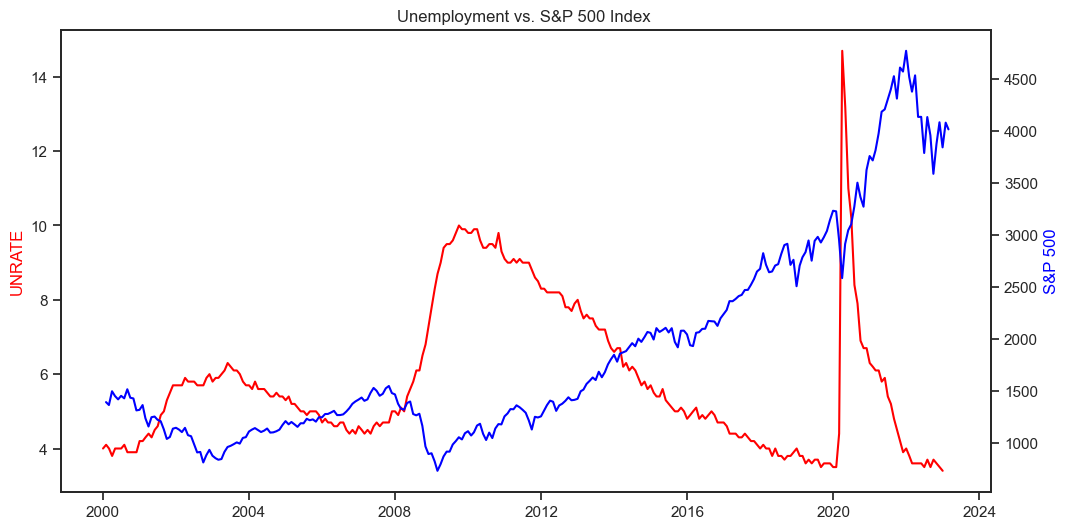

In [264]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt

# Replace YOUR_API_KEY with your actual FRED API key
fred = Fred(api_key=fredkey)

# Get the S&P 500 data
sp500 = fred.get_series('SP500')

# Get the inflation data
inflation = fred.get_series('CPALTT01USM657N')
inflation = inflation.loc['2000':]

# Calculate the inflation percentage change and cumulative sum
inflation_pct_change = inflation.pct_change().fillna(0)
inflation_cumulative = (1 + inflation_pct_change).cumprod() - 1

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_title('Inflation vs. S&P 500 Index ')

ax1.plot(inflation_cumulative.index, inflation_cumulative, color='red')
ax1.set_ylabel('Inflation Accumulated', color='red')

ax2 = ax1.twinx()
ax2.plot(sp500.index, sp500, color='blue')
ax2.set_ylabel('S&P 500', color='blue')

plt.show()


In [235]:
unemployment_rate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

Compartivo de la variación en el tiempo de la tasa de interés de la FED y el índice S&P 500

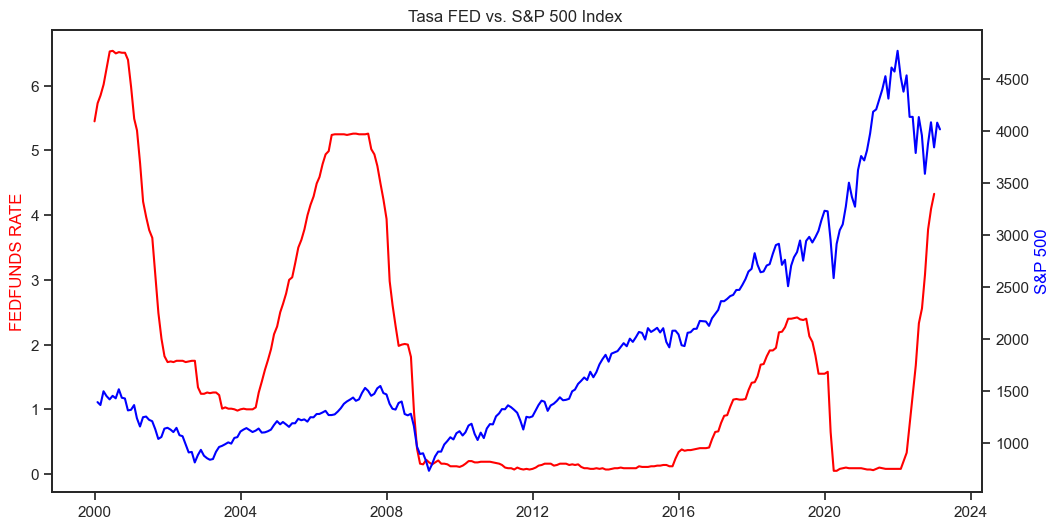

In [249]:
# carga del archivo con las variaciones de la tasa interés
from fredapi import Fred
import matplotlib.pyplot as plt

# Replace YOUR_API_KEY with your actual FRED API key
fred = Fred(api_key='083c28f1f599f240f0439dd8205695e8')

# Get the S&P 500 data
sp500 = fred.get_series('SP500')

# Get the unemployment rate data
fed = fred.get_series('FEDFUNDS')
fed = fed.loc['2000':]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_title('Tasa FED vs. S&P 500 Index ')

ax1.plot(fed.index, fed, color='red')
ax1.set_ylabel('FEDFUNDS RATE', color='red')

ax2 = ax1.twinx()
ax2.plot(sp500_adj_close.index, sp500_adj_close, color='blue')
ax2.set_ylabel('S&P 500', color='blue')

plt.show()

##### Confianza del consumidor vs Índice S&P 500 

El índice de confianza del consumidor mide la confianza que tiene el consumidor en la economía y su disposición a gastar dinero. 

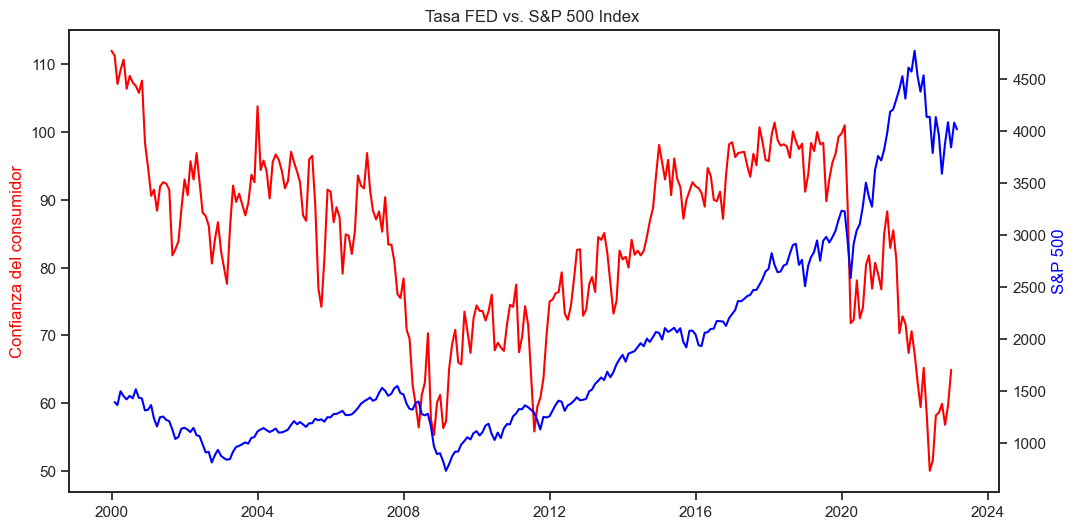

In [265]:
# carga del archivo con las variaciones de la confianza del consumidor

from fredapi import Fred
import matplotlib.pyplot as plt

# Replace YOUR_API_KEY with your actual FRED API key
fred = Fred(api_key='083c28f1f599f240f0439dd8205695e8')

# Get the S&P 500 data
sp500 = fred.get_series('SP500')

# Get the unemployment rate data
umcsent = fred.get_series('UMCSENT')
umcsent = umcsent.loc['2000':]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_title('Tasa FED vs. S&P 500 Index ')

ax1.plot(fed.index, fed, color='red')
ax1.set_ylabel('Confianza del consumidor', color='red')

ax2 = ax1.twinx()
ax2.plot(sp500_adj_close.index, sp500_adj_close, color='blue')
ax2.set_ylabel('S&P 500', color='blue')

plt.show()

##### Correlación de los indicadores macroeconómicos con el Índice S&P 500

In [270]:
import pandas as pd

# Seleccionar sólo la columna 'Adj Close' del data frame del índice S&P 500 
sp500 = pd.read_csv('SP500.csv', index_col='Date', parse_dates=True)

sp500_adj = sp500['Adj Close']

# Combinar los data frames de PIB (gdp), Inflación (inflation), Desempleo (unrate), Tasa Fed (fed), sentimientos del consumidor (umcsent)
df = pd.concat([sp500_adj, gdp, inflation, unrate, fed, umcsent], axis=1)

# Renombrar columnas
df.columns = ['adj_close', 'gdp', 'inflation', 'unrate', 'fed_rate', 'umcsent']

# Calcular matriz de correlación
corr_matrix = df.corr()

# Mostrar matriz de correlación
print(corr_matrix)

           adj_close       gdp  inflation    unrate  fed_rate   umcsent
adj_close   1.000000  0.940691   0.222672 -0.329836 -0.139711 -0.139711
gdp         0.940691  1.000000   0.125127 -0.115578 -0.230010 -0.230010
inflation   0.222672  0.125127   1.000000 -0.119946 -0.024936 -0.024936
unrate     -0.329836 -0.115578  -0.119946  1.000000 -0.507678 -0.507678
fed_rate   -0.139711 -0.230010  -0.024936 -0.507678  1.000000  1.000000
umcsent    -0.139711 -0.230010  -0.024936 -0.507678  1.000000  1.000000


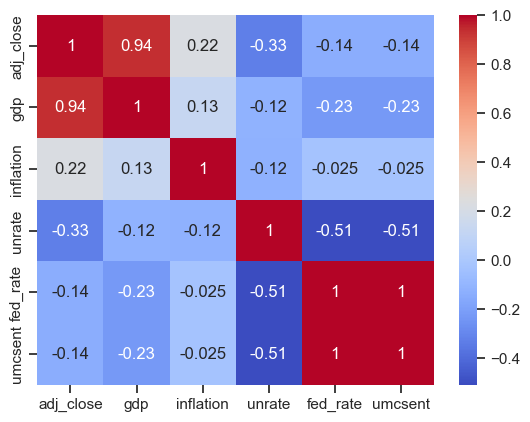

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

##### Vamos a crear un diccionario con los symbols de las empresas y los ETFs de los sectores económicos para poder comparar los sectores (que son 11) contra el índice. de Intentar hacerlo contra las empresas (503 empresas) sería difícil sacar con claridad algún análisis. 

In [279]:
# diccionario con los data frames de las empresas (la primera columna igual en todos: es el indice)
# La columna con los precios de cierre ajustados (adj_close) se llama con el mismo simbolo de cada empresa
#sp500_companies.keys()

# Lista de los símbolos de los ETFs correspondientes a los sectores GICS
sector_etfs = {'Energy': 'XLE',
               'Materials': 'XLB',
               'Industrials': 'XLI',
               'Consumer Discretionary': 'XLY',
               'Consumer Staples': 'XLP',
               'Health Care': 'XLV',
               'Financials': 'XLF',
               'Information Technology': 'XLK',
               'Communication Services': 'XLC',
               'Utilities': 'XLU',
               'Real Estate': 'XLRE'}

##### Creamos un diccionario cuyas llaves son los ETFs de cada sector. A cada llave se le asigna un data frame que contiene las columnas con el precio de cierre ajustado de cada empresa que pertenece al sector. 

In [283]:
sector_dfs = {}
for sector, etf in sector_etfs.items():
    # Get a list of companies in this sector ETF
    sector_companies = [symbol for symbol in sp500_companies.keys() if symbol in sp_df[sp_df['GICS Sector'] == sector]['Symbol'].values]
    # Create a list of data frames for each company in the sector
    company_dfs = [sp500_companies[symbol][symbol] for symbol in sector_companies]
    # Concatenate the data frames and add to the sector dictionary
    sector_df = pd.concat(company_dfs, axis=1)
    sector_dfs[sector] = sector_df


In [288]:
# Diccionario cuyas llaves son los ETFs 
updated_sector_dfs = {sector_etfs[key]: sector_dfs[key] for key in sector_dfs.keys()}

##### Exportamos los data frames del diccionario

In [371]:
import os
import pandas as pd

# Define the directory to save the CSV files in
dir_name = "sector_dfs"
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

# Loop through the sector dataframes and save each one to a CSV file
for sector, df in updated_sector_dfs.items():
    filename = os.path.join(dir_name, f"{sector}.csv")
    df.to_csv(filename)

In [372]:
up = updated_sector_dfs
up.keys()

dict_keys(['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XLK', 'XLC', 'XLU', 'XLRE'])

In [429]:
sp500Indx = sp500.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
sp500Indx = sp500Indx.reset_index()
print(sp500Indx.columns)

Index(['Date', 'Adj Close'], dtype='object')


In [420]:
## Para cada dataframe de sector vamos a remover las empresas que no tienen información desde el año 2000. 
# Esto para sacar el promedio del sector del precio de cierre ajustado y poder compararlo contra el del índice

losETFs = up.keys()
sectorIndex = {}
for etf in losETFs:
    dfe = up[etf]
    faltante = dfe.columns[dfe.isna().any()]
    limpio = dfe.drop(faltante, axis=1)
    columnas = limpio.columns
    limpio[etf] = limpio.mean(axis=1)
    sectorIndex[etf] = limpio.drop(columnas, axis=1)

In [436]:
indice500 = sp500Indx.copy()
for etf in losETFs:
    dfz = sectorIndex[etf]
    dfz = dfz.reset_index()
    indice500 = pd.concat([indice500, dfz[etf]], axis=1)
    #sectorIndex[etf] = sectorIndex[etf].reindex(sp500Indx.index)
    #sp500Indx[etf] = sectorIndex[etf][etf]

indice500 = indice500.set_index('Date')


Index(['Adj Close', 'XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XLK',
       'XLC', 'XLU', 'XLRE'],
      dtype='object')

In [454]:
#exportamos el df a csv
indice500.to_csv('sp500_y_sectores.csv')

In [451]:
grupo_1 = ['x', 'XLE', 'XLB', 'XLI']
grupo_2 = ['x', 'XLY', 'XLP', 'XLV']
grupo_3 = ['x', 'XLF', 'XLK', 'XLC']
grupo_4 = ['x', 'XLU', 'XLRE']

In [452]:
for i in range(1, len(grupo_1)):
    print(grupo_1[i])

XLE
XLB
XLI


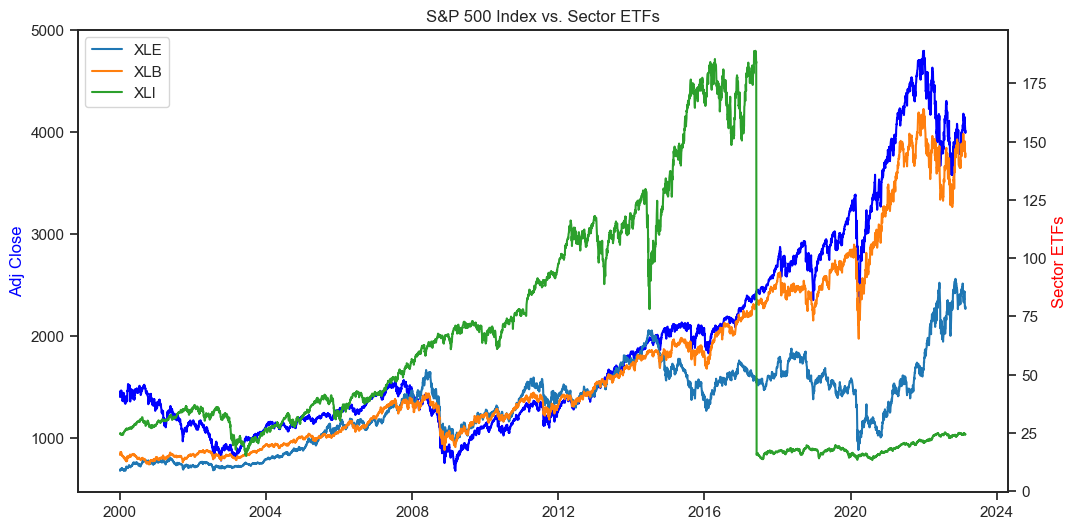

In [453]:
fig, ax1 = plt.subplots(figsize=(12,6))

# plot the first column of indice500 on the left y-axis
ax1.set_title('S&P 500 Index vs. Sector ETFs')
ax1.plot(indice500.index, indice500.iloc[:, 0], color='blue')
ax1.set_ylabel(indice500.columns[0], color='blue')

# plot the rest of the columns of indice500 on the right y-axis
ax2 = ax1.twinx()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#33a02c', '#984ea3']
for i in range(1, len(indice500.columns)):
    ax2.plot(indice500.index, indice500.iloc[:, i], color=colors[i-1])
ax2.set_ylabel('Sector ETFs', color='red')

# set the y-axis label and legend
ax1.set_ylabel(indice500.columns[0], color='blue')
ax2.set_ylabel('Sector ETFs', color='red')
ax2.legend(indice500.columns[1:], loc='upper right')

plt.show()
